In [244]:
%pip install pandas matplotlib numpy

Note: you may need to restart the kernel to use updated packages.


In [245]:
import pandas as pd
import matplotlib.pyplot as plt
import re


# Load dataset
data = pd.read_csv('data_training_selected_clusters_comments_and_rules.csv')
data.head()
# data.describe()

#Questions

,body,target_reason,target_description,public_description,subreddit_id,assigned_rule_cluster,label
0,"i’m white. be quiet, fool.","incivility, overly cruel or hostile","attack ideas, not people. the purpose of this ...",A catharsis for the frustrated moral philosoph...,t5_2xhvq,C - 14,violation
1,Luciferianism?,"incivility, overly cruel or hostile","attack ideas, not people. the purpose of this ...",A catharsis for the frustrated moral philosoph...,t5_2xhvq,C - 14,non_violation
2,West has a hate cult on this sub. Any post inv...,follow the standards of civility,follow the standards of civility:\n\n* no hate...,A community for discussion related to Unidenti...,t5_2qhds,C - 10,non_violation
3,[deleted],be respectful to others,in addition to enforcing [reddit's content pol...,Discussion regarding the potential collapse of...,t5_2qhw9,C - 08,non_violation
4,Dude... give it up... this is NOT &lt;&lt;caps...,rule b -d party/devils advocate/soapboxing (op...,you must personally hold the view and demonstr...,A place to post an opinion you accept may be f...,t5_2w2s8,C - 27,violation


In [ ]:

STOPWORDS = {
    # English
    "the","and","to","of","a","in","is","it","that","for","on","with","as","this","was","are","be",

    # Spanish
    "el","la","los","las","y","de","un","una","en","es","que","para","con","como","este","esta","fue","son","ser",

    # German
    "der","die","das","und","zu","von","ein","eine","ist","es","dass","für","mit","als","dies","diese","war","sind","sein",

    # French
    "le","les","et","à","de","un","une","dans","est","il","que","pour","avec","comme","ce","cette","était","sont","être"
}

EXTRA_STOPWORDS = {
    # German
    "sich","mir","mich","bei","aus","wo","des",

    # Italian
    "che","ti","te","tu","da","po",

    # Indonesian
    "yang",

    # Slavic
    "na","za"
}


def violationRateHead(title, data, minx, maxx, numBars):
    violations = data[data["label"] == "violation"]
    nonViolations = data[data["label"] == "non_violation"]
    violationCounts = violations["target_reason"].value_counts()
    nonViolationCounts = nonViolations["target_reason"].value_counts()

    # get total
    total = violationCounts.add(nonViolationCounts, fill_value=0)
    violationRate = violationCounts.divide(total)

    sorted = violationRate.sort_values(ascending=False).head(numBars)
    sorted.plot(kind="barh", title=title)
    plt.xlabel("Violation Rate")
    plt.xlim(minx, maxx)
    plt.show()



def violationRateTail(title, data, minx, maxx, numBars):
    violations = data[data["label"] == "violation"]
    nonViolations = data[data["label"] == "non_violation"]
    violationCounts = violations["target_reason"].value_counts()
    nonViolationCounts = nonViolations["target_reason"].value_counts()

    # get total
    total = violationCounts.add(nonViolationCounts, fill_value=0)
    violationRate = violationCounts.divide(total)

    sorted = violationRate.sort_values(ascending=False)
    nonZero = sorted[sorted > 0]
    tail = nonZero.tail(numBars)
    tail.plot(kind="barh", title=title)
    plt.xlabel("Violation Rate")
    plt.xlim(minx, maxx)
    plt.show()

## Question 1: How many comments were labeled violation vs non-violation?

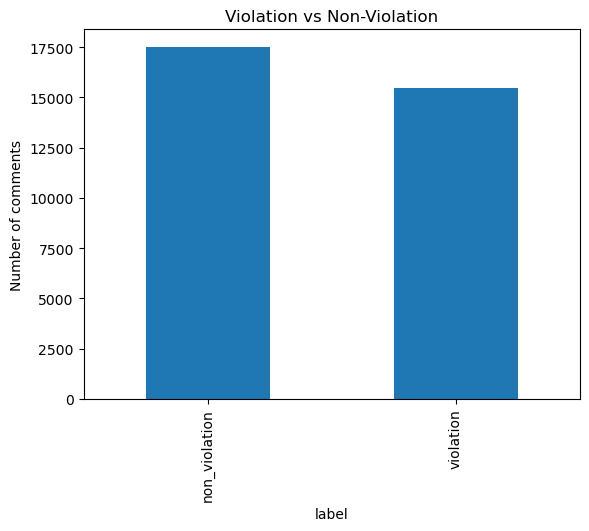

In [247]:
data["label"].value_counts().plot(kind="bar", title="Violation vs Non-Violation")
plt.ylabel("Number of comments")
plt.show()

## Question 2: Which rule clusters were violated the most

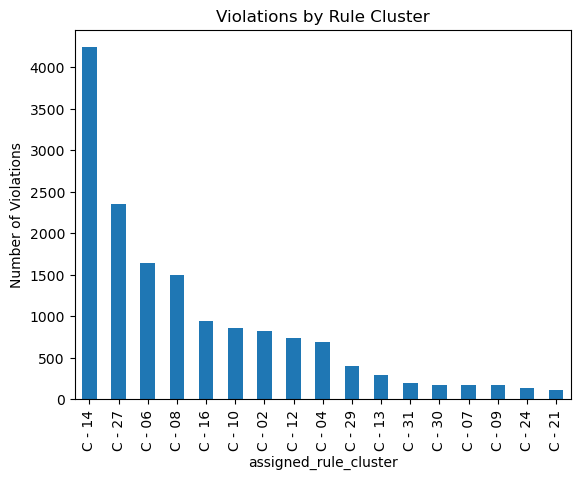

In [248]:
violations = data[data["label"] == "violation"]
rule_counts = violations["assigned_rule_cluster"].value_counts()

rule_counts.plot(kind="bar", title="Violations by Rule Cluster")
plt.ylabel("Number of Violations")
plt.show()



## Question 3: Which rule clusters had the highest violation rate?

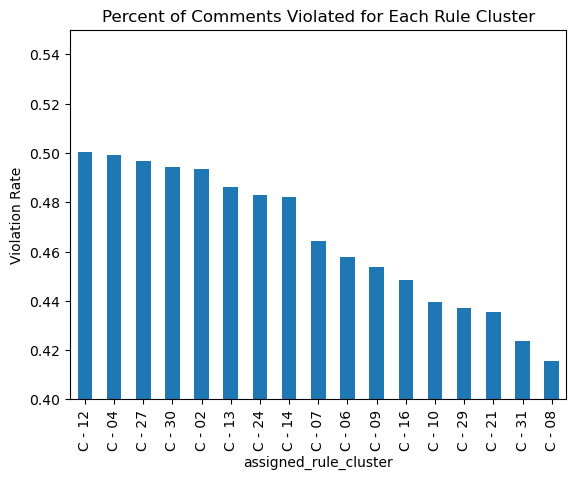

In [249]:
violations = data[data["label"] == "violation"]
nonviolations = data[data["label"] == "non_violation"]
rule_counts = violations["assigned_rule_cluster"].value_counts()/ (
violations["assigned_rule_cluster"].value_counts() + nonviolations["assigned_rule_cluster"].value_counts() )

sorted = rule_counts.sort_values(ascending=False)
sorted.plot(kind="bar", title="Percent of Comments Violated for Each Rule Cluster")
plt.ylabel("Violation Rate")
plt.ylim(0.4, 0.55)
plt.show()



## Question 4: Do questions violate more often or less often?

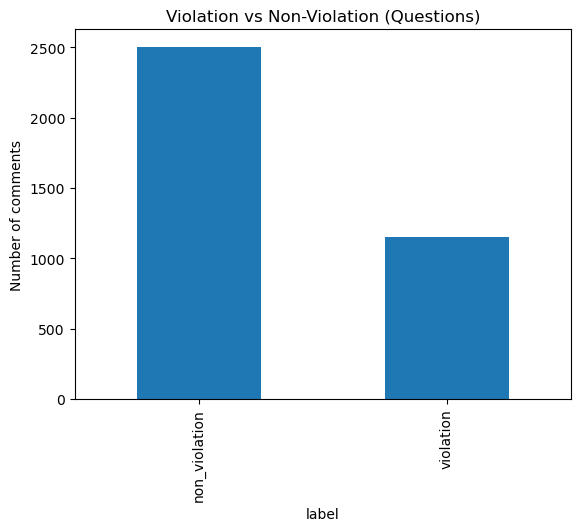

In [250]:
questions = data[data["body"].str.endswith("?")]

questions["label"].value_counts().plot(
    kind="bar",
    title="Violation vs Non-Violation (Questions)"
)

plt.ylabel("Number of comments")
plt.show()

## Question: 5. Which words were unique to violating and non violating comments?

In [251]:
def clean_text(text):
    # decode common HTML
    text = text.replace("&gt;", ">").replace("&lt;", "<").replace("&amp;", "&")
    # Remove punctuation
    text = re.sub(r"[^\w\s]", "", text)
    return text.lower()

# Apply cleaning
data["clean_body"] = data["body"].astype(str).apply(clean_text)

# Split into words
data["words"] = data["clean_body"].str.split()

# Explode into rows
words_df = data.explode("words")
words_df = words_df[~words_df.index.isin(STOPWORDS|EXTRA_STOPWORDS)]

# Separate by label
violations_df = words_df[words_df["label"] == "violation"]
non_violations_df = words_df[words_df["label"] == "non_violation"]

# Count words
violation_counts = violations_df["words"].value_counts()
non_violation_counts = non_violations_df["words"].value_counts()

# Keep only unique words per label
unique_violations = violation_counts[~violation_counts.index.isin(non_violation_counts.index)]
unique_non_violations = non_violation_counts[~non_violation_counts.index.isin(violation_counts.index)]

# Top 20 most frequent unique words
top_violations = unique_violations.head(10)
top_non_violations = unique_non_violations.head(10)

print("Top 20 Unique Words in Violations:")
print(top_violations)

print("\nTop 20 Unique Words in Non-Violations:")
print(top_non_violations)



Top 20 Unique Words in Violations:
words
nta            635
yta            613
dipshit         82
esh             57
cmv             53
bungie          52
clueless        26
eren            26
pretentious     24
mommas          22
Name: count, dtype: int64

Top 20 Unique Words in Non-Violations:
words
und            330
ich            287
der            285
es             249
nicht          237
ufishmahbot    163
zu             154
auch           146
den            141
bir            138
Name: count, dtype: int64


## Question 6: Which common words have the highest violation rate?

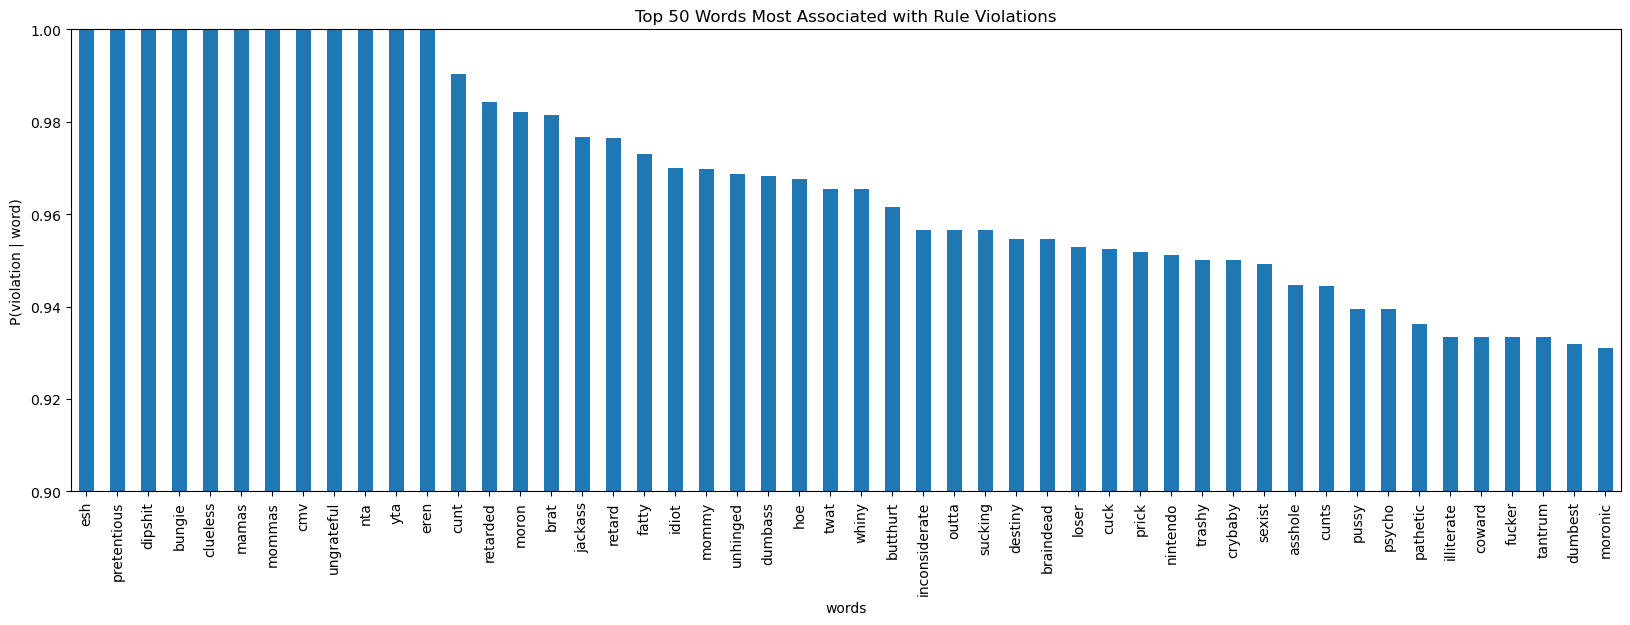

In [ ]:
word_df = pd.DataFrame({
    "violation": violation_counts,
    "non_violation": non_violation_counts
}).fillna(0)

word_df["total"] = word_df["violation"] + word_df["non_violation"]
word_df["violation_rate"] = word_df["violation"] / word_df["total"]
# this filters to words with more than 20 occurences
word_df = word_df[word_df["total"] >= 20]
# take out stopwords
word_df = word_df[~word_df.index.isin(STOPWORDS|EXTRA_STOPWORDS)]
top50 = word_df.sort_values("violation_rate", ascending=False).head(50)
plt.figure(figsize=(20, 6))
top50["violation_rate"].plot(kind="bar")
plt.ylabel("P(violation | word)")
plt.title("Top 50 Words Most Associated with Rule Violations")
plt.ylim(0.9, 1)

plt.show()

## Question 7: Which common words have the lowest non zero violation rate?

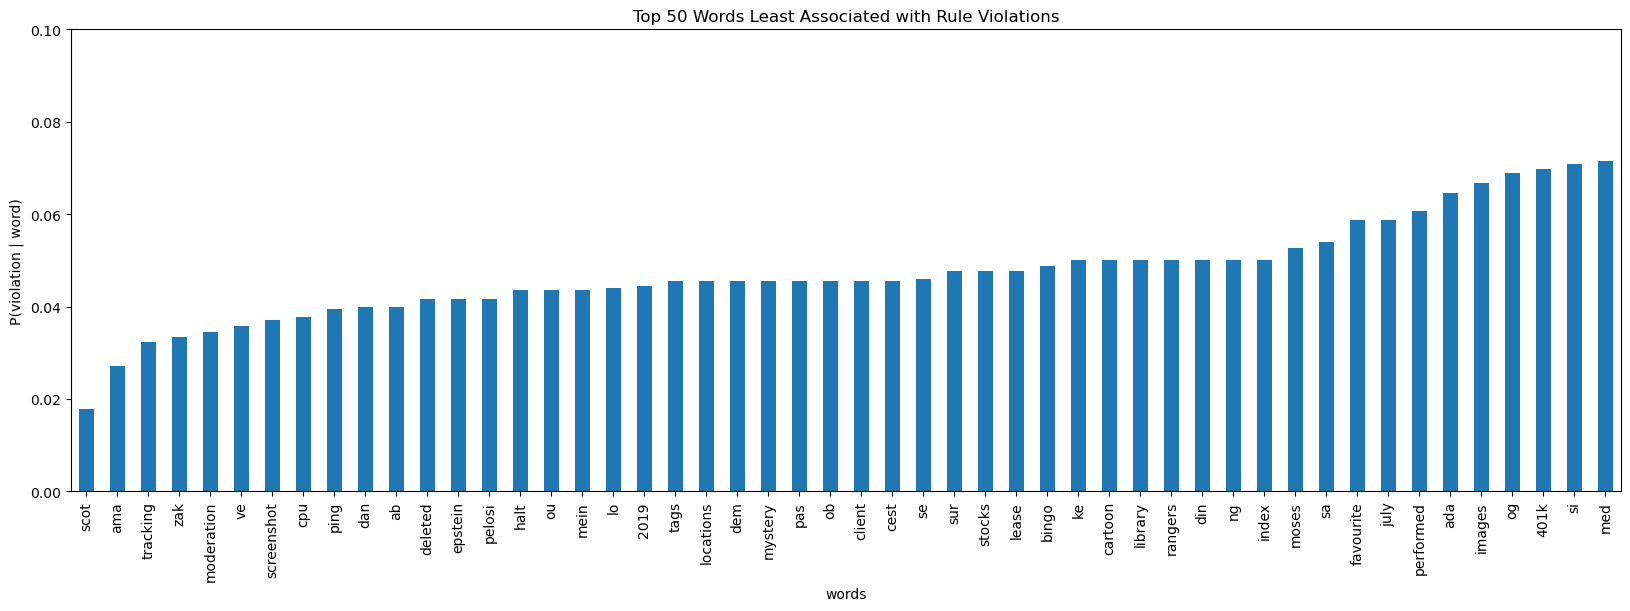

In [277]:
top50 = word_df[word_df["violation_rate"] > 0].sort_values("violation_rate", ascending=True).head(50)
plt.figure(figsize=(20, 6))
top50["violation_rate"].plot(kind="bar")
plt.ylabel("P(violation | word)")
plt.title("Top 50 Words Least Associated with Rule Violations")
plt.ylim(0, .1)

plt.show()


## Question 8: Do the length of comments have a coorelation to violation rate?

C:\Users\rshyp\AppData\Local\Temp\ipykernel_28212\850713585.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby("length_bin")["label"]


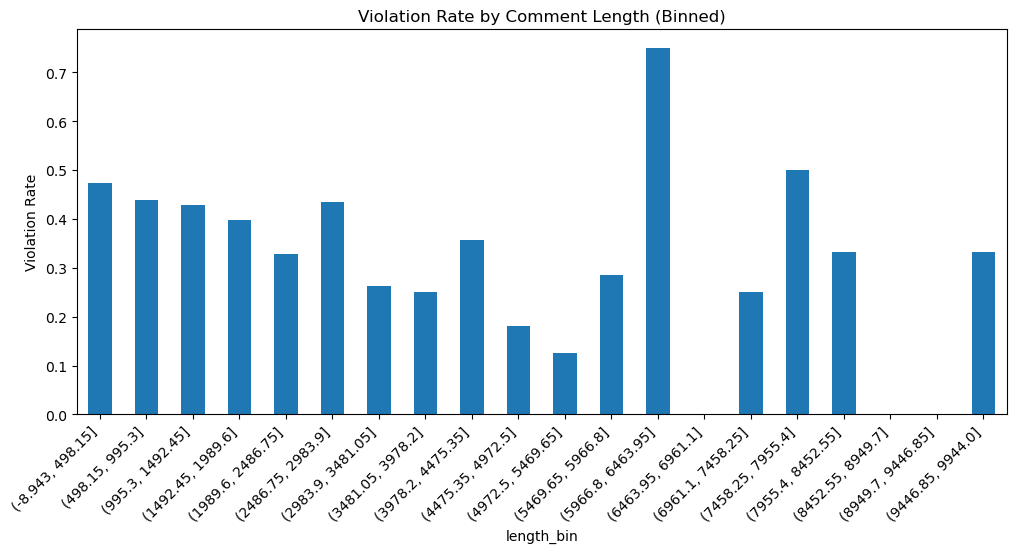

In [278]:
# Calculate length for each comment
data["length"] = data["body"].astype(str).str.len()

# Create bins
data["length_bin"] = pd.cut(data["length"], bins=20)

# Compute violation rate per bin
violation_rate = (
    data.groupby("length_bin")["label"]
    .apply(lambda x: (x == "violation").mean())
)

ax = violation_rate.plot(
    kind="bar",
    figsize=(12,5),
    title="Violation Rate by Comment Length (Binned)"
)

ax.set_ylabel("Violation Rate")
plt.xticks(rotation=45, ha="right")
plt.show()

## Question 9: Which target reasons had highest violation rate?

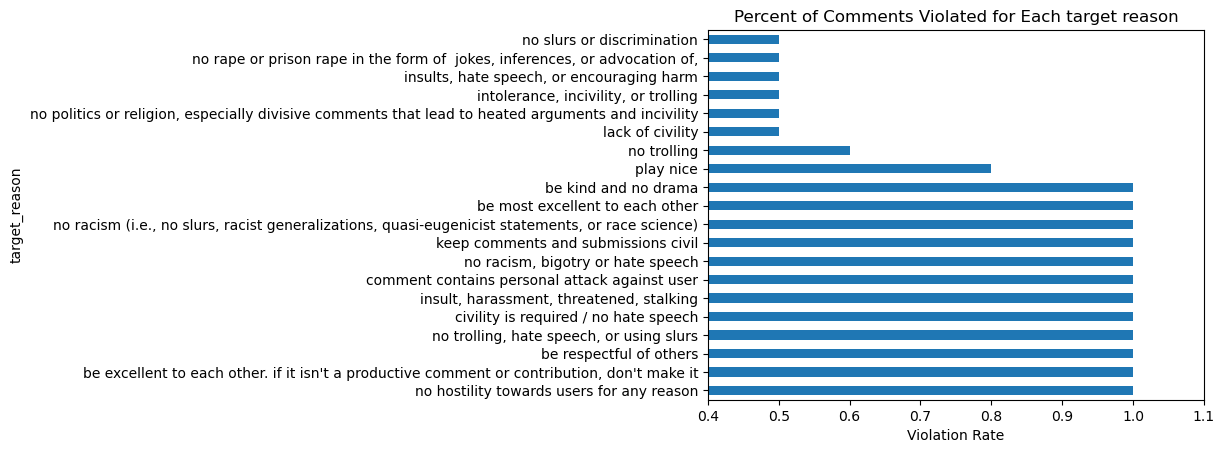

In [279]:
violationRateHead("Percent of Comments Violated for Each target reason", data, 0.4, 1.1, 20)

## Question 10: Which target reasons had lowest violation rate?

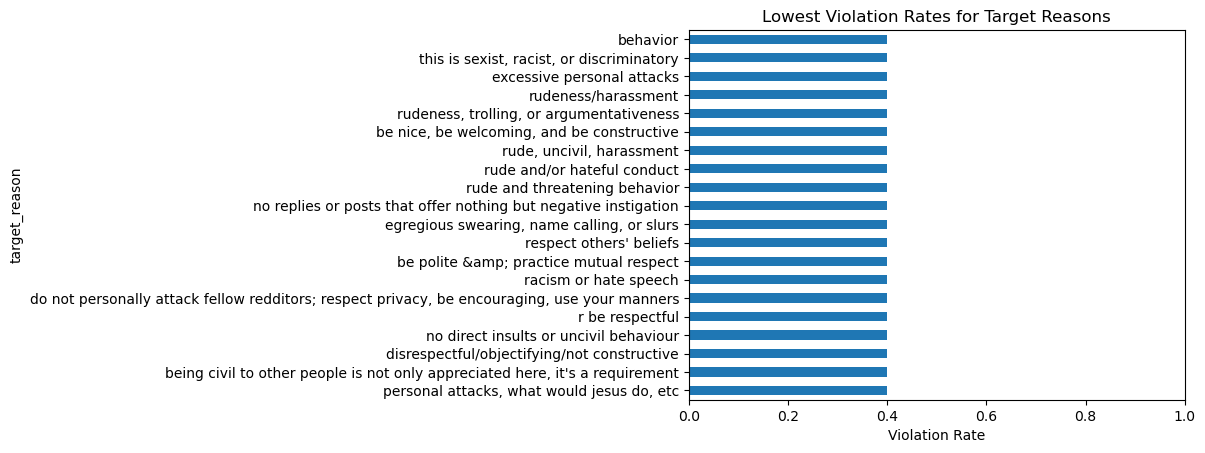

In [280]:
violationRateTail("Lowest Violation Rates for Target Reasons", data, 0.0, 1, 20)

## Question 11: Which Restrictive Norms had the Highest Violation Rates?

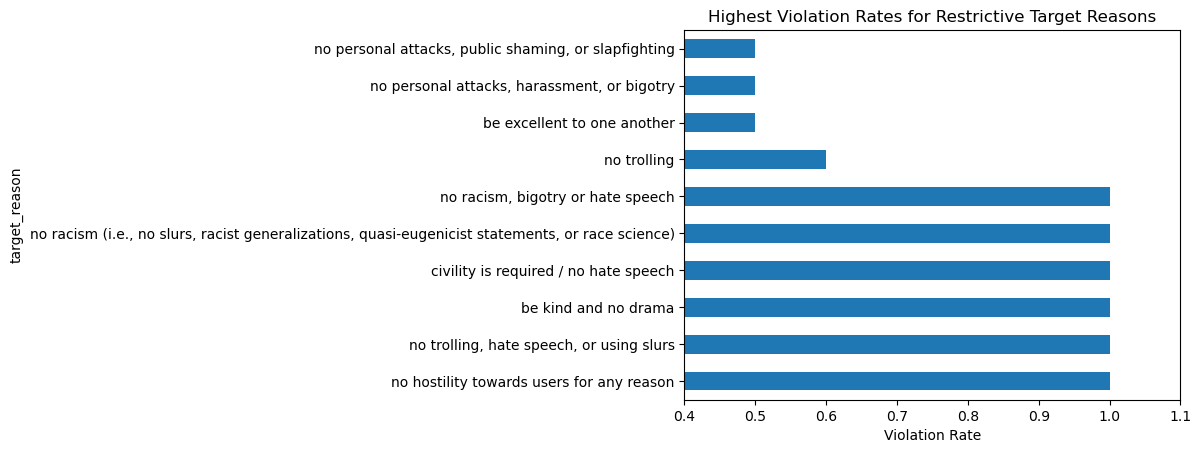

In [281]:
#words that show up in restrictive reasons
restrict = ["no", "not"]
pattern = "|".join(restrict)
restricted  = data[data["target_reason"].str.contains(pattern, case=False, na=False)]
unrestricted = data.drop(restricted.index)
restrictedReasons = restricted["target_reason"].unique()
unrestrictedReasons = unrestricted["target_reason"].unique()

violationRateHead("Highest Violation Rates for Restrictive Target Reasons", restricted, 0.4, 1.1, 10)

## Question 12: Which Unestrictive Norms had the Highest Violation Rates?

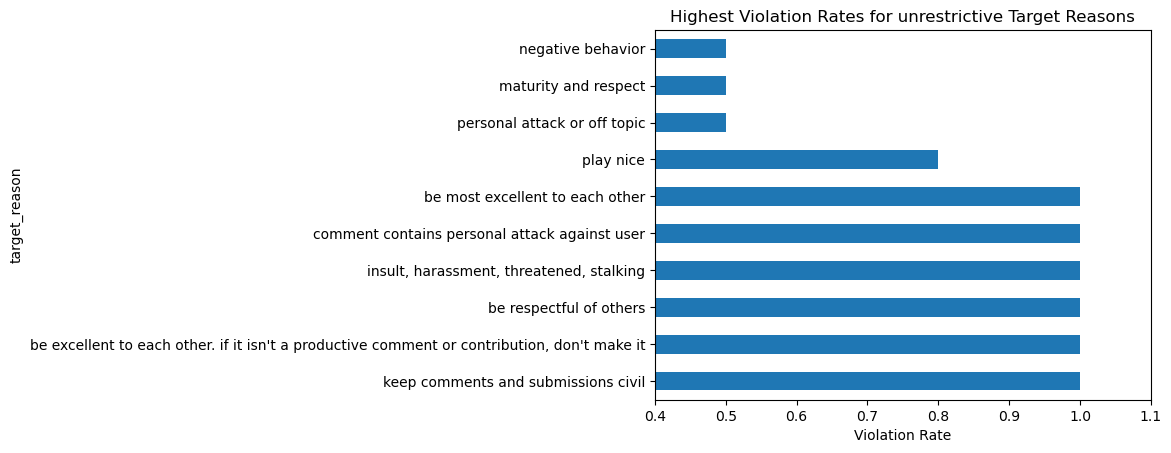

In [282]:
violationRateHead("Highest Violation Rates for unrestrictive Target Reasons", unrestricted, 0.4, 1.1, 10)

## Question 13:

## Question 14: